In [1]:
import pandas as pd

In [2]:
%matplotlib inline

In [27]:
import plotly.express as px

In [3]:
penguins = pd.read_csv('palmer_penguins.csv')

In [4]:
penguins.shape

(344, 7)

In [5]:
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [55]:
penguins.loc[penguins.isna()]

ValueError: Cannot index with multidimensional key

<AxesSubplot:ylabel='Frequency'>

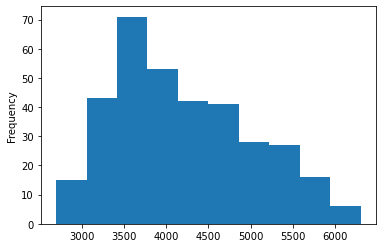

In [7]:
penguins.body_mass_g.plot(kind = 'hist')

## Distribution of body mass by sex?

In [9]:
pd.crosstab(penguins.body_mass_g, penguins.sex)

sex,female,male
body_mass_g,,
2700.0,1,0
2850.0,2,0
2900.0,4,0
2925.0,1,0
3000.0,2,0
...,...,...
5850.0,0,3
5950.0,0,2
6000.0,0,2


<AxesSubplot:>

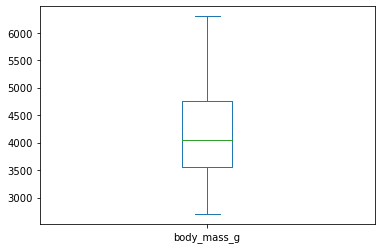

In [20]:
penguins.body_mass_g.plot(kind = 'box')

In [21]:
penguins.body_mass_g.describe()

count     342.000000
mean     4201.754386
std       801.954536
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4750.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [16]:
penguins.loc[(penguins.sex == 'female') & (penguins.island == 'Torgersen')]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
15,Adelie,Torgersen,36.6,17.8,185.0,3700.0,female
16,Adelie,Torgersen,38.7,19.0,195.0,3450.0,female
18,Adelie,Torgersen,34.4,18.4,184.0,3325.0,female
68,Adelie,Torgersen,35.9,16.6,190.0,3050.0,female
70,Adelie,Torgersen,33.5,19.0,190.0,3600.0,female


In [19]:
penguins.loc[((penguins.sex == 'female') & (penguins.body_mass_g)), 'body_mass_g']

1      3800.0
2      3250.0
4      3450.0
6      3625.0
12     3200.0
        ...  
335    3525.0
337    3650.0
338    3650.0
340    3400.0
343    3775.0
Name: body_mass_g, Length: 165, dtype: float64

<AxesSubplot:ylabel='Frequency'>

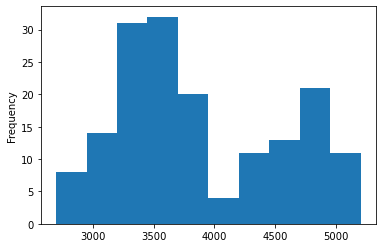

In [22]:
penguins[penguins.sex == 'female'].body_mass_g.plot(kind = 'hist')

In [24]:
penguins[penguins.sex == 'female'].body_mass_g.describe()

count     165.000000
mean     3862.272727
std       666.172050
min      2700.000000
25%      3350.000000
50%      3650.000000
75%      4550.000000
max      5200.000000
Name: body_mass_g, dtype: float64

In [25]:
penguins[penguins.sex == 'male'].body_mass_g.describe()

count     168.000000
mean     4545.684524
std       787.628884
min      3250.000000
25%      3900.000000
50%      4300.000000
75%      5312.500000
max      6300.000000
Name: body_mass_g, dtype: float64

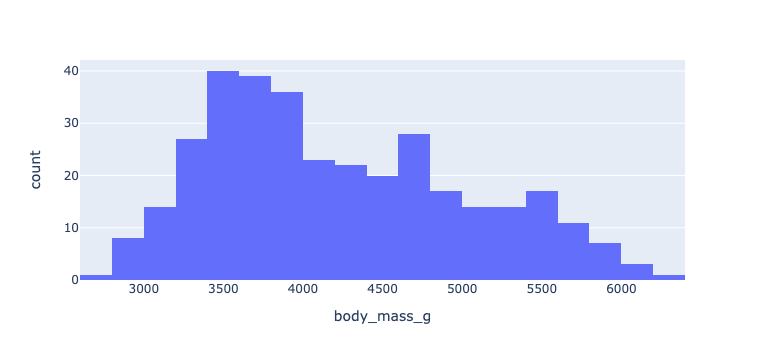

In [38]:
body_mass_fig = px.histogram(data_frame = penguins, x = 'body_mass_g')
body_mass_fig.show()

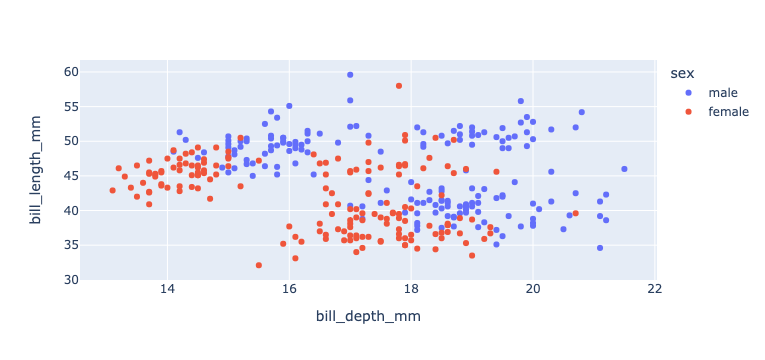

In [39]:
fig = px.scatter(penguins[penguins.sex.isin(['male', 'female'])], x='bill_depth_mm', y='bill_length_mm', color='sex')
fig.show()

In [45]:
## distribution of males vs females
f_pg = penguins.groupby(penguins['island']).sex.value_counts()
f_pg

island     sex   
Biscoe     male      83
           female    80
Dream      male      62
           female    61
Torgersen  female    24
           male      23
Name: sex, dtype: int64

In [49]:
f_pg = penguins.groupby(penguins['body_mass_g']).sex

In [59]:
# look at body mass

bm = penguins.groupby(penguins['sex']).body_mass_g


In [60]:
#penguins[penguins['body_mass_g']].agg('mean')

#penguins[penguins['body_mass_g']].agg('mean')
penguins[penguins.sex == 'female'].body_mass_g.agg('mean')

3862.2727272727275

In [64]:
penguins.groupby('sex').body_mass_g.agg(['mean', 'sum', 'count'])

,mean,sum,count
sex,,,
female,3862.272727,637275.0,165
male,4545.684524,763675.0,168
